In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-02-24 15:23:24.757241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 15:23:24.757273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 15:23:24.758276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 15:23:24.763710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-24 15:23:25.346900: W tensorflow/compiler/tf2

In [2]:
# Load data
max_features = 10000
maxlen = 300
batch_size = 64

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print('Train sequences:', len(x_train))
print('Test sequences:', len(x_test))


Train sequences: 25000
Test sequences: 25000


In [3]:
x_train = pad_sequences(x_train, maxlen) 
x_test = pad_sequences(x_test, maxlen)
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

X_train shape: (25000, 300)
X_test shape: (25000, 300)


In [4]:
# Creating model
def RNN_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.SimpleRNN(64),
    layers.Dropout(0.25),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_rnn = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=epochs,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_rnn

In [5]:
# Train
model, history_rnn = RNN_model(max_features, maxlen, epochs=5, batch_size=batch_size)

Epoch 1/5


2024-02-24 15:23:29.685701: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-02-24 15:23:29.685731: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: ivan-Nitro-AN515-45
2024-02-24 15:23:29.685740: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: ivan-Nitro-AN515-45
2024-02-24 15:23:29.685869: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 525.147.5
2024-02-24 15:23:29.685893: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 470.223.2
2024-02-24 15:23:29.685899: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 470.223.2 does not match DSO version 525.147.5 -- cannot find working devices in this configuratio

391/391 [==============================] - 20s 49ms/step - loss: 0.5619 - accuracy: 0.6947 - val_loss: 1.4487 - val_accuracy: 0.5208
Epoch 2/5
391/391 [==============================] - 19s 48ms/step - loss: 0.5798 - accuracy: 0.6989 - val_loss: 0.5815 - val_accuracy: 0.6856
Epoch 3/5
391/391 [==============================] - 19s 48ms/step - loss: 0.4551 - accuracy: 0.7863 - val_loss: 0.4745 - val_accuracy: 0.7791
Epoch 4/5
391/391 [==============================] - 19s 47ms/step - loss: 0.3911 - accuracy: 0.8354 - val_loss: 0.4688 - val_accuracy: 0.7953
Epoch 5/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5358 - accuracy: 0.7326
Test Accuracy: 73.26%


In [6]:
# Display the model summary table to see all layers and their parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1292417 (4.93 MB)
Trainable params: 1292417 (4.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Creating model
def LSTM_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.LSTM(64),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_lstm = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=epochs,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_lstm

In [8]:
# Train model
model, history_lstm = LSTM_model(max_features, maxlen, epochs=5, batch_size=batch_size) 

Epoch 1/5
391/391 [==============================] - 42s 104ms/step - loss: 0.4052 - accuracy: 0.8200 - val_loss: 0.3133 - val_accuracy: 0.8747
Epoch 2/5
391/391 [==============================] - 42s 106ms/step - loss: 0.2390 - accuracy: 0.9064 - val_loss: 0.3128 - val_accuracy: 0.8708
Epoch 3/5
391/391 [==============================] - 39s 101ms/step - loss: 0.1839 - accuracy: 0.9319 - val_loss: 0.3579 - val_accuracy: 0.8610
Epoch 4/5
391/391 [==============================] - 39s 101ms/step - loss: 0.1410 - accuracy: 0.9486 - val_loss: 0.3486 - val_accuracy: 0.8579
Epoch 5/5
782/782 [==============================] - 12s 15ms/step - loss: 0.4594 - accuracy: 0.8500
Test Accuracy: 85.00%


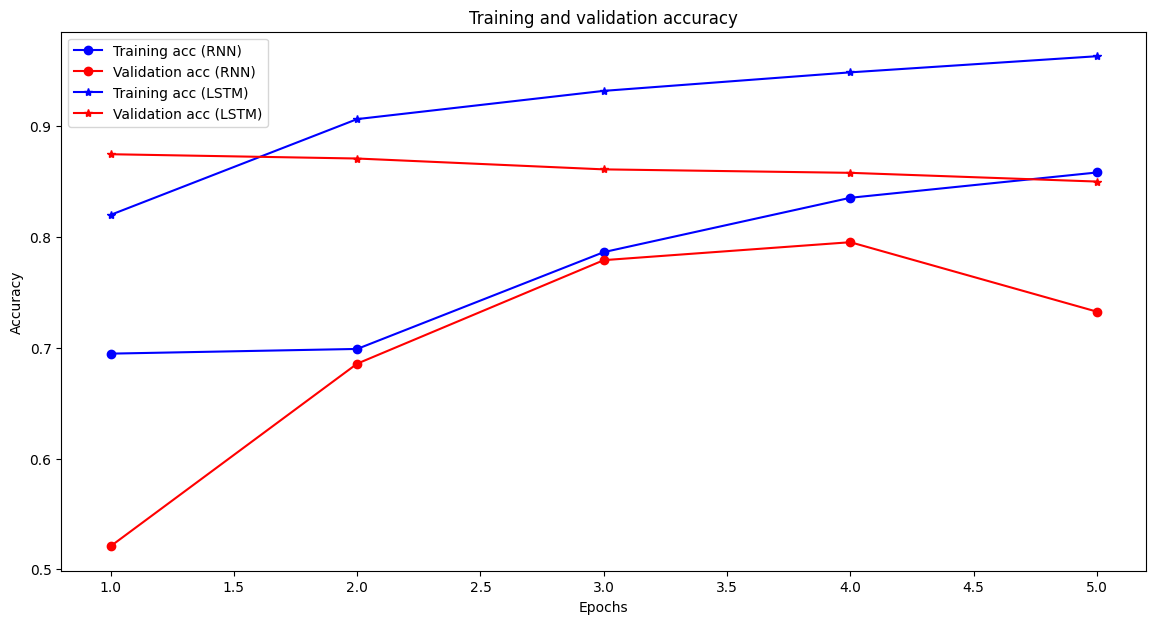

In [9]:
# Vizualization

# RNN training parameters
rnn_val_acc = history_rnn.history['val_accuracy']
rnn_acc = history_rnn.history['accuracy']

# LSTM training parameters
lstm_val_acc = history_lstm.history['val_accuracy']
lstm_acc = history_lstm.history['accuracy']

# Defining the number of epochs
epochs = range(1, len(rnn_acc) + 1)

# Create an accuracy graph
plt.figure(figsize=(14, 7))

# Accuracy graph for RNN
plt.plot(epochs, rnn_acc, 'bo-', label='Training acc (RNN)')
plt.plot(epochs, rnn_val_acc, 'ro-', label='Validation acc (RNN)')

# Accuracy graph for LSTM
plt.plot(epochs, lstm_acc, 'b*-', label='Training acc (LSTM)')
plt.plot(epochs, lstm_val_acc, 'r*-', label='Validation acc (LSTM)')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
# Creating a Deep LSTM Network
def deep_LSTM_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.1),
    layers.LSTM(128),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_deep_lstm = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=10,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_deep_lstm 

In [11]:
# Train model
model, history_deep_lstm = deep_LSTM_model(max_features, maxlen, epochs=5, batch_size=batch_size)

Epoch 1/10
196/196 [==============================] - 78s 388ms/step - loss: 0.3905 - accuracy: 0.8136 - val_loss: 0.3250 - val_accuracy: 0.8635
Epoch 2/10
196/196 [==============================] - 76s 388ms/step - loss: 0.2267 - accuracy: 0.9124 - val_loss: 0.3618 - val_accuracy: 0.8640
Epoch 3/10
196/196 [==============================] - 74s 379ms/step - loss: 0.1617 - accuracy: 0.9410 - val_loss: 0.3503 - val_accuracy: 0.8620
Epoch 4/10
196/196 [==============================] - 75s 384ms/step - loss: 0.1163 - accuracy: 0.9592 - val_loss: 0.4090 - val_accuracy: 0.8536
Epoch 5/10
196/196 [==============================] - 75s 381ms/step - loss: 0.0834 - accuracy: 0.9718 - val_loss: 0.4493 - val_accuracy: 0.8554
Epoch 6/10
196/196 [==============================] - 73s 375ms/step - loss: 0.0702 - accuracy: 0.9769 - val_loss: 0.5380 - val_accuracy: 0.8557
Epoch 7/10
196/196 [==============================] - 75s 385ms/step - loss: 0.0620 - accuracy: 0.9787 - val_loss: 0.5581 - val_ac

In [14]:
# Creating a Bidirectional Network
def bidirectional_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.Dropout(0.1),
        layers.Bidirectional(layers.LSTM(128)), 
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_bidirectional = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=epochs,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_bidirectional 

In [15]:
# Train model
model, history_bidirectional = bidirectional_model(max_features, maxlen, epochs=5, batch_size=batch_size)

Epoch 1/5
391/391 [==============================] - 166s 417ms/step - loss: 0.3828 - accuracy: 0.8251 - val_loss: 0.3115 - val_accuracy: 0.8691
Epoch 2/5
391/391 [==============================] - 166s 424ms/step - loss: 0.2232 - accuracy: 0.9157 - val_loss: 0.3102 - val_accuracy: 0.8767
Epoch 3/5
391/391 [==============================] - 165s 422ms/step - loss: 0.1525 - accuracy: 0.9446 - val_loss: 0.3762 - val_accuracy: 0.8666
Epoch 4/5
391/391 [==============================] - 164s 420ms/step - loss: 0.1383 - accuracy: 0.9506 - val_loss: 0.4342 - val_accuracy: 0.8494
Epoch 5/5
782/782 [==============================] - 48s 61ms/step - loss: 0.4528 - accuracy: 0.8404
Test Accuracy: 84.04%


ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

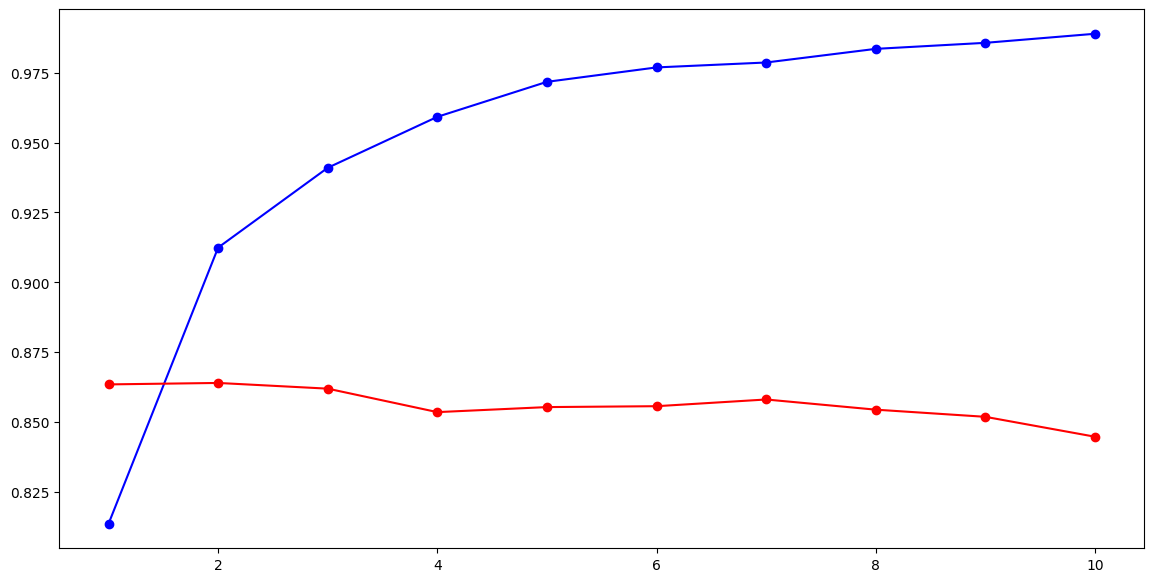

In [16]:
# Vizualization

# Deep LSTM Network training parameters
lstm_val_acc = history_deep_lstm.history['val_accuracy']
lstm_acc = history_deep_lstm.history['accuracy']

# Bidirectional models training parameters
bidirectional_val_acc = history_bidirectional.history['val_accuracy']
bidirectional_acc = history_bidirectional.history['accuracy']

# Defining the number of epochs
epochs = range(1, len(lstm_acc) + 1)

# Create an accuracy graph
plt.figure(figsize=(14, 7))

# Accuracy graph for Deep LSTM Network
plt.plot(epochs, lstm_acc, 'bo-', label='Training acc (deep LSTM)')
plt.plot(epochs, lstm_val_acc, 'ro-', label='Validation acc (deep LSTM)')

# Accuracy graph for Bidirectional
plt.plot(epochs, bidirectional_acc, 'b*-', label='Training acc (Bidirectional)')
plt.plot(epochs, bidirectional_val_acc, 'r*-', label='Validation acc (Bidirectional)')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Висновок:
Модель LSTM виявилась більш ефективною у врахуванні контексту даних завдяки здатності зберігати інформацію на довгі періоди, що призвело до кращої точності на тестових даних.

Глибока LSTM мережа, яка включала кілька шарів LSTM, показала ще кращі результати, підтверджуючи припущення, що додавання глибини може допомогти в моделюванні складніших залежностей в даних.

Двостороння LSTM мережа забезпечила високу точність, використовуючи інформацію з тексту в обох напрямках, що дозволило ще краще вловлювати контекст відгуків.